In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
import imblearn
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTETomek

In [3]:
def plot_data(X, y):
    y = pd.DataFrame(data=y).values.astype(float)
    X = pd.DataFrame(X)
    plt.figure(figsize=(8, 6), dpi=80)
    plt.scatter(X[y == 0].values[:,2], X[y == 0].values[:,1], label="Class #0", alpha=0.5, c='#1F77B4',  marker='o')
    plt.scatter(X[y == 1].values[:,2], X[y == 1].values[:,1], label="Class #1", alpha=0.5, c='#FF7F0E', marker='s')
    plt.legend()
    return plt.show()

In [4]:
def prep_data(df):
    X = df.drop(['Class'], axis=1)
    y = df['Class']
    return X, y

In [5]:
df = pd.read_csv("creditcard_sampledata_3.csv", sep=",")

In [6]:
df.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,258647,1.725265,-1.337256,-1.012687,-0.361656,-1.431611,-1.098681,-0.842274,-0.026594,-0.032409,...,0.414524,0.793434,0.028887,0.419421,-0.367529,-0.155634,-0.015768,0.010790,189.00,0
1,69263,0.683254,-1.681875,0.533349,-0.326064,-1.455603,0.101832,-0.520590,0.114036,-0.601760,...,0.116898,-0.304605,-0.125547,0.244848,0.069163,-0.460712,-0.017068,0.063542,315.17,0
2,96552,1.067973,-0.656667,1.029738,0.253899,-1.172715,0.073232,-0.745771,0.249803,1.383057,...,-0.189315,-0.426743,0.079539,0.129692,0.002778,0.970498,-0.035056,0.017313,59.98,0
3,281898,0.119513,0.729275,-1.678879,-1.551408,3.128914,3.210632,0.356276,0.920374,-0.160589,...,-0.335825,-0.906171,0.108350,0.593062,-0.424303,0.164201,0.245881,0.071029,0.89,0
4,86917,1.271253,0.275694,0.159568,1.003096,-0.128535,-0.608730,0.088777,-0.145336,0.156047,...,0.031958,0.123503,-0.174528,-0.147535,0.735909,-0.262270,0.015577,0.015955,6.53,0


In [7]:
df.shape

(5050, 31)

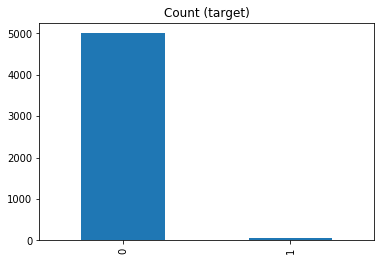

In [8]:
df.Class.value_counts().plot(kind='bar', title='Count (target)');

In [9]:
df['Class'].value_counts()
pd.DataFrame(data=np.array(df['Class'].value_counts()), index=['Classe 0', 'Classe 1'], columns=['Quantidade de amostras'])

,Quantidade de amostras
Classe 0,5000
Classe 1,50


In [10]:
df['Class'].value_counts() / df.shape[0]
pd.DataFrame(data=np.array(df['Class'].value_counts() / df.shape[0]), index=['Classe 0', 'Classe 1'], columns=['Porcentagem de amostras'])

,Porcentagem de amostras
Classe 0,0.990099
Classe 1,0.009901


In [11]:
X, y = prep_data(df)

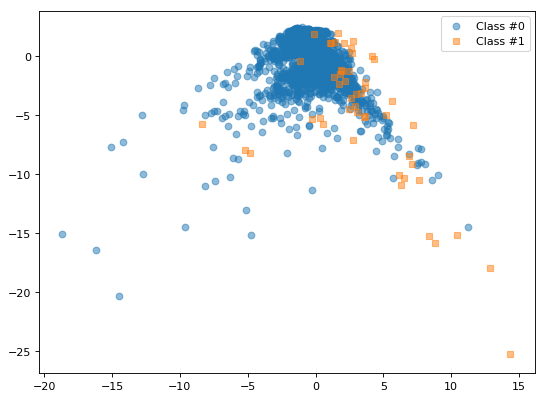

In [12]:
plot_data(X, y)

## Aplicando Random Under Sampler

In [12]:
from imblearn.under_sampling import RandomUnderSampler

In [13]:
randomUnderSampler = RandomUnderSampler(return_indices=True)

In [14]:
X_rus, y_rus, id_rus = randomUnderSampler.fit_sample(X, y)

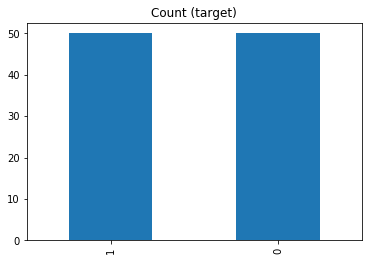

In [15]:
pd.DataFrame(y_rus, columns=['Class']).Class.value_counts().plot(kind='bar', title='Count (target)');

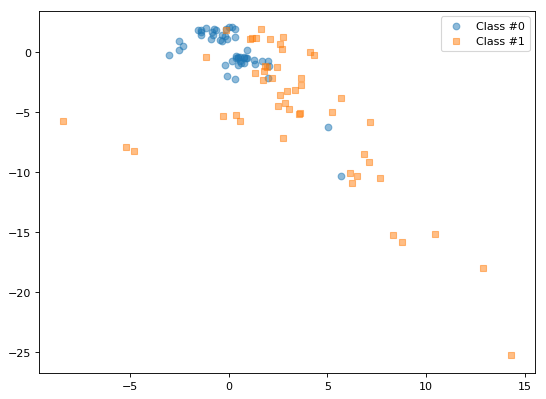

In [16]:
plot_data(X_rus, y_rus)

## Aplicando Random Over Sampler

In [17]:
from imblearn.over_sampling import RandomOverSampler

In [18]:
randomOverSampler = RandomOverSampler()

In [19]:
X_resampled, y_resampled = randomOverSampler.fit_sample(X, y)

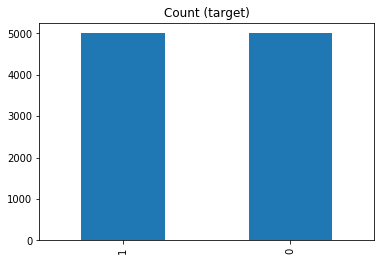

In [20]:
pd.DataFrame(y_resampled, columns=['Class']).Class.value_counts().plot(kind='bar', title='Count (target)');

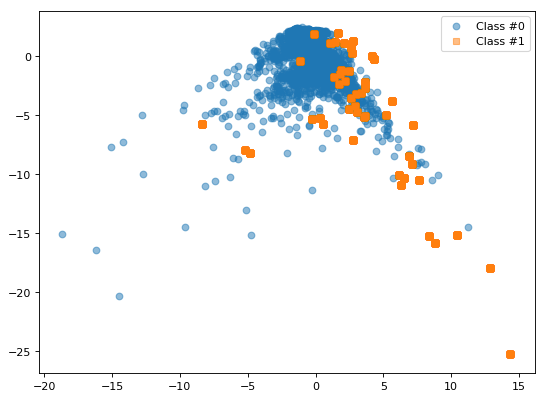

In [21]:
plot_data(X_resampled, y_resampled)

## Aplicando Tomek Links

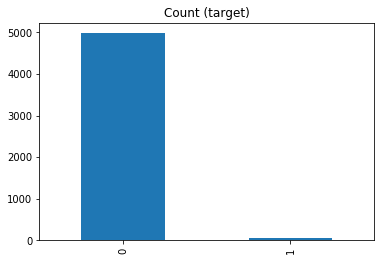

In [18]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

pd.DataFrame(y_tl, columns=['Class']).Class.value_counts().plot(kind='bar', title='Count (target)');

In [21]:
X_tl.shape

(5029, 30)

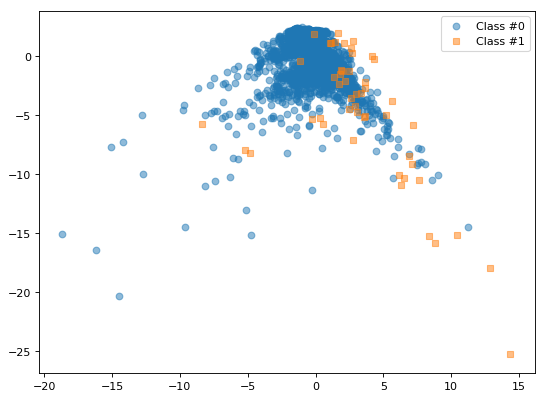

In [19]:
plot_data(X_tl, y_tl)

## Cluster Centroids

In [22]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={0: 10})
X_cc, y_cc = cc.fit_sample(X, y)

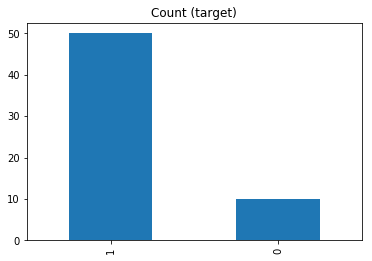

In [23]:
pd.DataFrame(y_cc, columns=['Class']).Class.value_counts().plot(kind='bar', title='Count (target)');

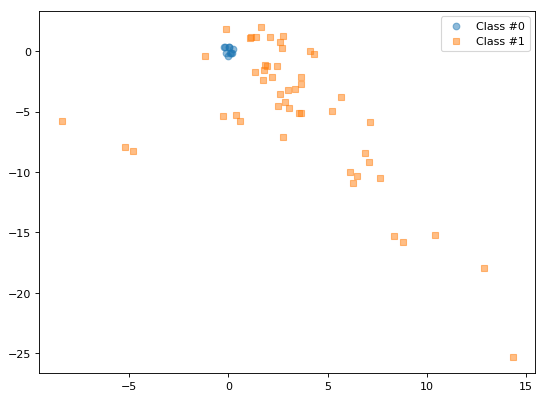

In [24]:
plot_data(X_cc, y_cc)

## Aplicando SMOTE

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
smote = SMOTE(kind='regular')

In [24]:
X_resampled_smote, y_resampled_smote = smote.fit_sample(X, y)

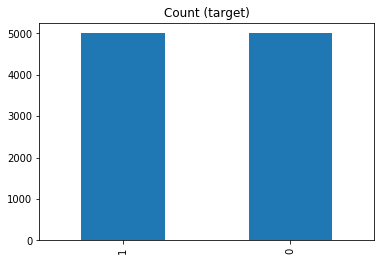

In [25]:
pd.DataFrame(y_resampled_smote, columns=['Class']).Class.value_counts().plot(kind='bar', title='Count (target)');

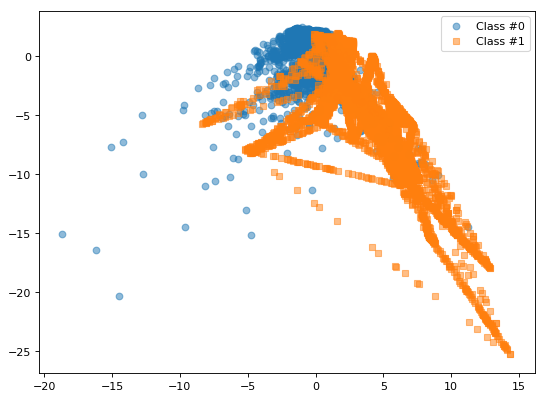

In [26]:
plot_data(X_resampled_smote, y_resampled_smote)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# Não utilizar accurancy e sim utilizar precision, recall ou f1-score

In [28]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Fit a logistic regression model to our data
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtain model predictions
predicted = model.predict(X_test)

c:\users\allan\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


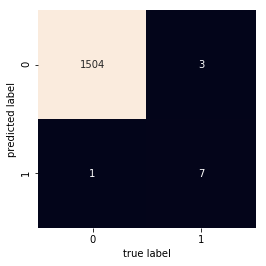

In [29]:
mat = confusion_matrix(y_test, predicted)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [30]:
print('Classifcation report:\n', classification_report(y_test, predicted))

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1505
           1       0.88      0.70      0.78        10

   micro avg       1.00      1.00      1.00      1515
   macro avg       0.94      0.85      0.89      1515
weighted avg       1.00      1.00      1.00      1515



In [31]:
from imblearn.pipeline import Pipeline 

In [32]:
resampling = SMOTE(kind='borderline2')
model = LogisticRegression()

In [33]:
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [35]:
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

c:\users\allan\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


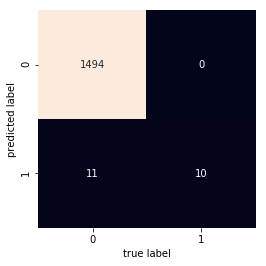

In [36]:
mat = confusion_matrix(y_test, predicted)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [37]:
print('Classifcation report:\n', classification_report(y_test, predicted))

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1505
           1       0.48      1.00      0.65        10

   micro avg       0.99      0.99      0.99      1515
   macro avg       0.74      1.00      0.82      1515
weighted avg       1.00      0.99      0.99      1515



In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
resampling = SMOTE(kind='borderline2')
model = RandomForestClassifier(random_state=5)

In [40]:
pipeline = Pipeline([('SMOTE', resampling), ('Random Forest', model)])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [46]:
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

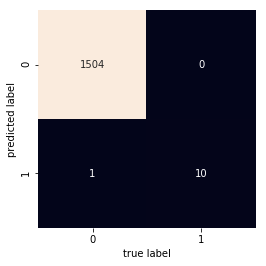

In [47]:
mat = confusion_matrix(y_test, predicted)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [48]:
print('Classifcation report:\n', classification_report(y_test, predicted))

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1505
           1       0.91      1.00      0.95        10

   micro avg       1.00      1.00      1.00      1515
   macro avg       0.95      1.00      0.98      1515
weighted avg       1.00      1.00      1.00      1515

